# Step 1 : Music Genre Clustering
---


## Introduction
Author : Hafidzati Hikmadani <br>
<br>
<br>

## Dataset

A dataset of 2017 songs with attributes from Spotify's API.Each row represents a song.

There are 16 columns. 13 of which are song attributes, one column for song name, one for artist, and a column called "target" which is the label for the song.

Here are the 13 track attributes: acousticness, danceability, durationms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, timesignature, valence.

You could download dataset from [here](https://www.kaggle.com/geomack/spotifyclassification).<br><br>

## Attribute Information:

| Attributes | Description |
| -: | :- |
| Unnamed: 0 | Random numbering only |
| acousticness   | A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. |
| danceability  | Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. |
| duration_ms | The duration of the track in milliseconds. |
| energy | Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. |
| instrumentalness | Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. |
| key | The key the track is in. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. |
| liveness | Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. |
| loudness | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. |
| mode  | Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. |
| speechiness  | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks |
| tempo | The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. |
| time_signature  | An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). |
| valence  | A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry). |
| target  | Wether author like or not |
| song_title  | The songs title |
| artist  | The singer/artist of songs |



<br>
<br>

## Goals

1. Portion of major and minor track in dataset 
2. Does accousticness affecting loudness of songs? 
3. Does tempo affecting the loudness of a songs?
4. Does weak loudness of song tend to has minor mode?? 
5. Pick trend between valence and danceability attributes from one artist
6. Create clusters for songs classification based on songs attributes or recomendation purpose in future.


## Import Library

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import BayesianGaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2


from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.model_selection import train_test_split

## Data Loading

In [54]:
#Load data
data = pd.read_csv("dataset/data.csv")

#Prerview spoiler of data
data.head(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino


We have some songs attributes above.

In [55]:
#Dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In dataset, we have 17 columns divided by 15 numerical attributes and 2 object attributes.

In [56]:
#Show total rows and attributes
data.shape

(2017, 17)

We have 2017 data songs with 17 attributes.

## Data Cleaning

First, let's copy the dataset.

In [57]:
#Copy dataset
df= data.copy()

### Handling Missing Values

In [58]:
#Check missing values
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

We don't have any missing values in here. But in future, if there is missing/null value we will drop the row. Our expectation the data processed must be completed data. We insert this dropping missing values in our pipeline.

### Handling Duplicate Data

In [59]:
df.duplicated().sum()

0

We don't have any duplicated value.But in future we will drop it if we have any duplicated row.

## Dropping unnecessary columns

In this context, since our purpose to make a new cluster and model prediction , we won't use Unamed:0 and Target columns.

In [60]:
#Drop unamed & target columns
df.drop(["Unnamed: 0","target"], axis=1 , inplace=True)

In [61]:
#Check datashape
print("Now we only have ",df.shape[1], " attribute left" )

Now we only have  15  attribute left


### Split Numerical and Categorical Attributes

Recalling the attributes description before, below we've divided our numerical and categorical attributes. Some column might have numeric value, but in representation it has categorical meaning. That's why we will divide it manually.

In [62]:
#Split num and cat
num_df = df[["acousticness","danceability","duration_ms","energy","instrumentalness","liveness","loudness","speechiness","tempo","valence"]]
cat_df = df[["song_title","artist","key","mode","time_signature"]]

print("Numeric Attributes   : ", num_df.shape[1])
print("Categoric Attributes : ", cat_df.shape[1])

Numeric Attributes   :  10
Categoric Attributes :  5


### Checking Outlier

Let's check outlier of numeric attributes from the boxplot first

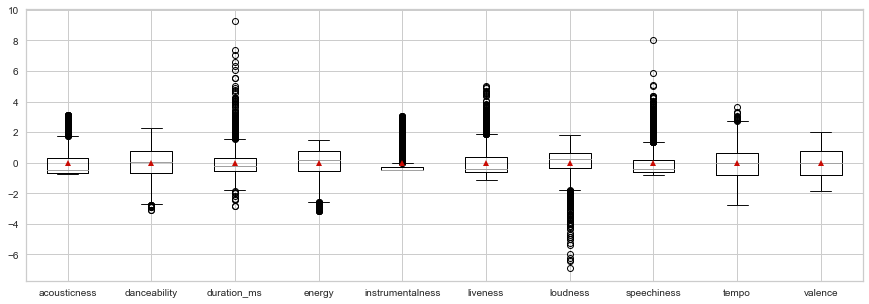

In [63]:
#Graph
t = pd.DataFrame(StandardScaler().fit_transform(num_df), columns=num_df.columns)
plt.figure(figsize=(15,5))
t.boxplot(showmeans=True)
plt.show()


From the boxplot, all of our numeric attributes seems has outlier. Let's get into deep of each attributes.

In [64]:
#Describe num attributes
num_df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,0.190844,-7.085624,0.092664,121.603272,0.496815
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,0.155453,3.761684,0.089931,26.685604,0.247195
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.018800,-33.097000,0.023100,47.859000,0.034800
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,0.092300,-8.394000,0.037500,100.189000,0.295000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,0.127000,-6.248000,0.054900,121.427000,0.492000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,0.247000,-4.746000,0.108000,137.849000,0.691000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,0.969000,-0.307000,0.816000,219.331000,0.992000


If we looking at min and max value of each attributes for all attributes (except duration_ms and tempo) has maximal value below 1 and minimal value above 0. These are inline with dataset description before, that each of those attributes has value range 0-1, so we assume those outlier are normal data.

Now, let's get dive into duration_ms and tempo. For tempo, in music perspective there is no boundary for good or odd tempo. So we assume all tempo values in data set are valid. Now we're going to check duration_ms since commonly songs has duration aroun 3-4 minutes.

__Duration ms__

In [65]:
#Function to find out outlier based on distance from IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [66]:
#Find out upper and lower boundary of duration_ms
upper_boundary, lower_boundry = find_skewed_boundaries(df, 'duration_ms', 1.5)
upper_boundary , lower_boundry

(375810.0, 94538.0)

We have 375.810 which means around 6 minutes are our upper boundary and around 1,5 minutes are our lower boundary.

Any data which has duration ms above 6 minutes or below 1,5 minutes might be outlier.

In [67]:
#Result upper boundary
print("Portion :  ",  df[df["duration_ms"] > upper_boundary]["duration_ms"].count() / df["duration_ms"].count() * 100)
df[df["duration_ms"] > upper_boundary].head(2)

Portion :   6.494794248884482


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
4,0.180,0.678,392893,0.561,0.51200,5,0.439,-11.648,0,0.0694,174.004,4.0,0.904,Parallel Lines,Junior Boys
17,0.233,0.789,447907,0.659,0.00049,4,0.184,-12.654,0,0.0429,122.415,4.0,0.842,One Nation Under a Groove,Funkadelic


Portion of our dataset which is above outer boundary is 6,5% of dataset. After we check some these data point in spotify, these datapoint was a valid songs. So we will keep these all for our model.

In [68]:
#Result lower boundary
print("Portion :  ",  df[df["duration_ms"] < lower_boundry]["duration_ms"].count() / df["duration_ms"].count() * 100)
df[df["duration_ms"] < lower_boundry].head(2)

Portion :   0.495785820525533


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,song_title,artist
533,0.00814,0.401,93267,0.972,0.878000,0,0.3820,-2.236,1,0.0886,152.839,4.0,0.405,No Ass,FIDLAR
804,0.00042,0.220,82893,0.940,0.000541,0,0.0926,-2.397,1,0.0511,83.072,4.0,0.720,Just Wanna Love You Girl,Epsilons


Portion of our dataset which is above outer boundary is 0,5% of dataset. After we check some these data point in spotify, these datapoint was a valid songs too. So we will keep these all for our model.

## Data Visualization

### Numerical Attributes Distribution

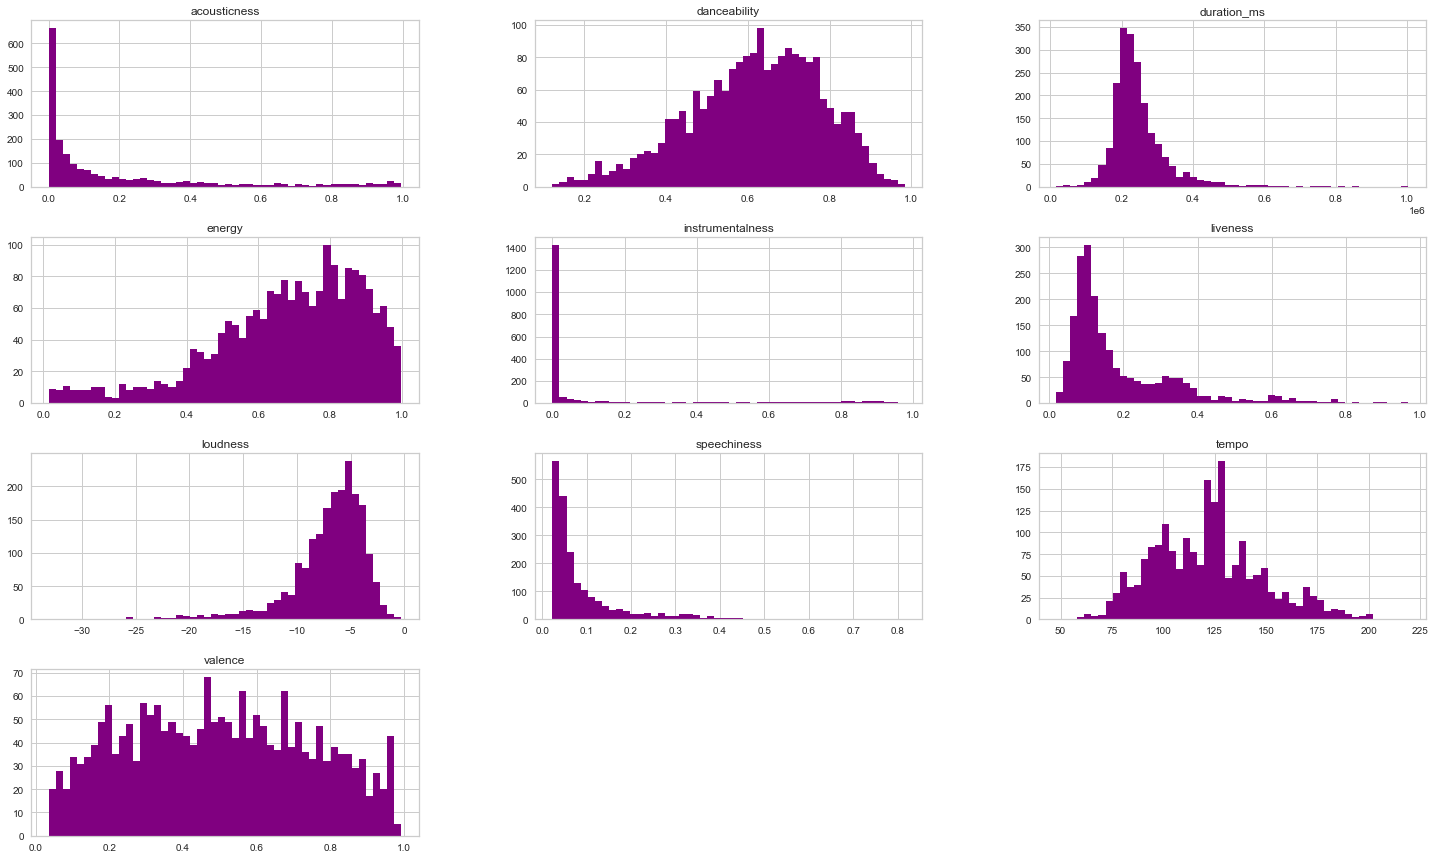

In [69]:
#Graph
warnings.filterwarnings("ignore")
fig = plt.figure(figsize=(25,15));
ax = fig.gca();
num_df.hist(bins=50, ax=ax, color="purple")
plt.show()

Almost of the songs attributes has normal distribution with some skewed.

### Categorical Attributes Distribution

In [70]:
#Check Cardinality of Categorical Attributes
print("Total data row :", df.shape[0])
print("")
for i in cat_df.columns :
    print("Total cardinality ",i," : ", len(df[i].unique()))

Total data row : 2017

Total cardinality  song_title  :  1956
Total cardinality  artist  :  1343
Total cardinality  key  :  12
Total cardinality  mode  :  2
Total cardinality  time_signature  :  4


### Visualization Insight

__Does accousticness affecting loudness of songs?__


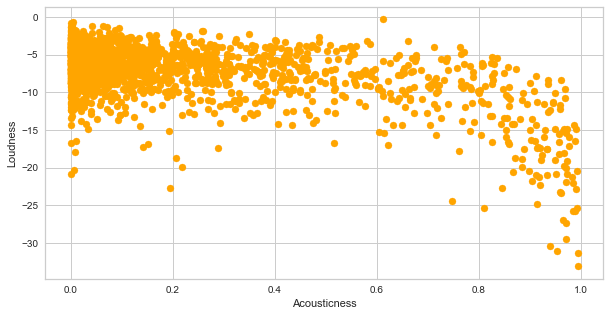

In [71]:
#Graph
plt.figure(figsize=(10,5))
plt.scatter(df["acousticness"], df["loudness"], color ="orange")
plt.xlabel("Acousticness")
plt.ylabel("Loudness")
plt.show()

From above scatter we could see some negative correlation between acousticness and loudness of songs eventhough it's not that clear. We could see, songs which is ultimate accoustic seems has low loudness.

It's pretty inline with the fact, mostly accoustic music is not that loud with smaller loudness in dB.

__Does tempo affecting the loudness of a songs?__


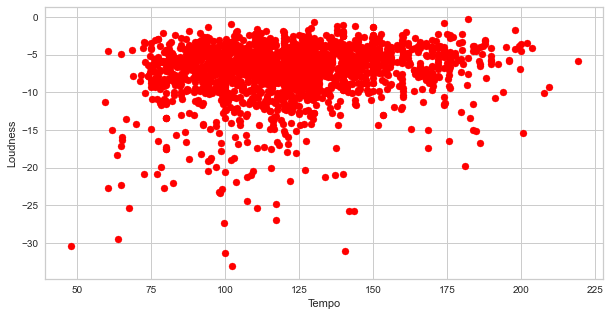

In [72]:
#Graph
plt.figure(figsize=(10,5))
plt.scatter(df["tempo"], df["loudness"], color ="red")
plt.xlabel("Tempo")
plt.ylabel("Loudness")
plt.show()

We could see, there are no correlation between acousticness and tempo. Seems all song has similar tempo.

We could see song_title and artist has high cardinality against it's dataset. It has total unique value more than a half of dataset.

__Does weak loudness of song tend to has minor mode?__

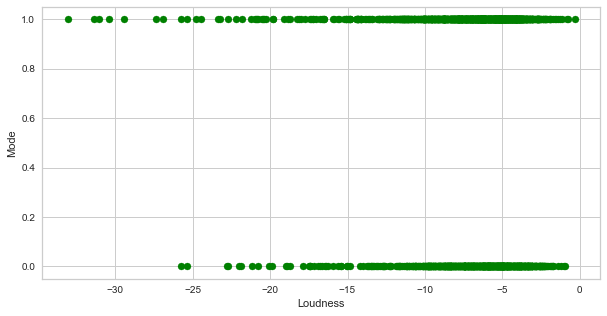

In [73]:
#Graph
plt.figure(figsize=(10,5))
plt.scatter(df["loudness"], df["mode"], color ="green")
plt.xlabel("Loudness")
plt.ylabel("Mode")
plt.show()

From above result, we could see some major songs has lowest decible of loudness (weak sound) , even major mode represent happy taste of songs. (Major =1 , Minor= 0)


We could conclude there are not relation between mode of song against its loudness.

__Trend between valence and danceability attributes from one artist__

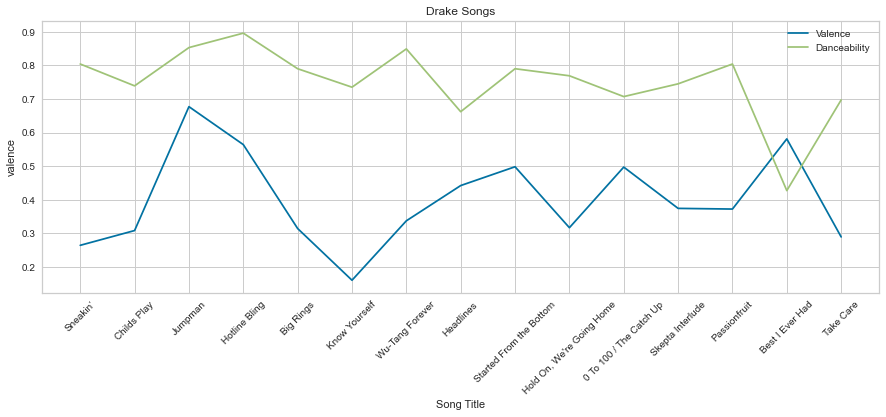

In [74]:
#Query
drake = df[df["artist"] == "Drake"]

plt.figure(figsize=(15,5))
#sns.lineplot(x=drake["song_title"], y= drake["loudness"], label="Loudness")
sns.lineplot(x=drake["song_title"], y= drake["valence"], label="Valence")
sns.lineplot(x=drake["song_title"], y= drake["danceability"], label="Danceability")
plt.xticks(rotation=45)
plt.xlabel("Song Title")
plt.title("Drake Songs")
plt.show()

Value of valence of Drake's songs tend to following values of danceibility. It has inline insight that tell high valence means the songs is happy , cheerfull or euphoric which able to use for dance.

__Portion of major and minor track in dataset__

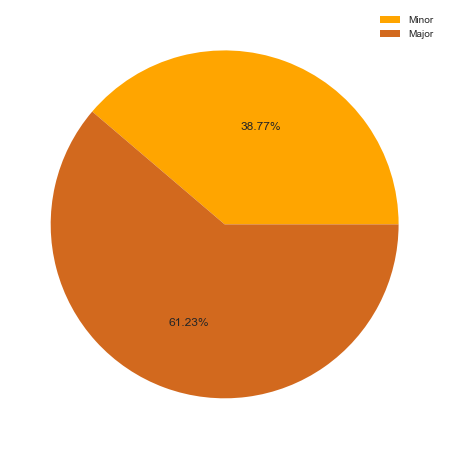

In [75]:
#Query
q1 = df.groupby("mode")["song_title"].count().reset_index()

#Graph
plt.figure(figsize=(10,8))
plt.pie(q1["song_title"], autopct='%.2f%%', explode=[0,0], colors =["orange", "chocolate"])
plt.legend(q1["mode"], labels=["Minor", "Major"])
plt.show()


Almost 62% of our songs dataset is filled up by Major song which has happy or positives taste.

## Data PreProcessing

Since goals is to make cluster from dataset, we will only use numerical feature.

We will do some preprocesing :
- Split data into train and test set
- Scaling our numeric data
- Check MultiCollinearity
- Dimensionality Reduction

In [76]:
# to make this notebook's output identical at every run
np.random.seed(42)

### Split dataset

In [77]:
#split data to train ,test and sample
train, test = train_test_split(df, test_size=0.1, random_state=42, shuffle=True)

train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

#filter only numerical data
train_df = train[num_df.columns]

print("Total of training data   : ", train_df.shape[0])
print("Total of testing  data   : ", test.shape[0])


Total of training data   :  1815
Total of testing  data   :  202


In [78]:
#Export data test for future purpose
test.to_csv("dataset/test.csv", index= False)

### Scaling Numerical Data

In [79]:
#Define Scaler
scaler = StandardScaler()

#Fit and transform numerical data
train_dfs = scaler.fit_transform(train_df)

## Calculating Multicollinearity

In here we will check if there is any multicollinearity / strong relation between our features.

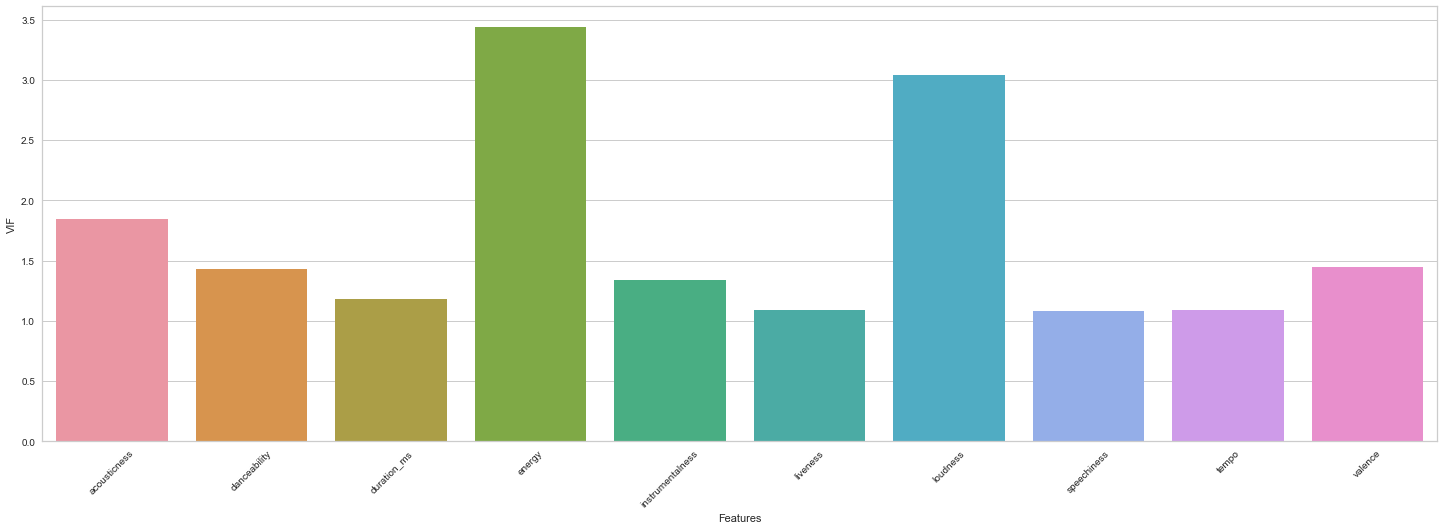

,Features,VIF
0,acousticness,1.841275
1,danceability,1.433425
2,duration_ms,1.181626
3,energy,3.436844
4,instrumentalness,1.339337
5,liveness,1.091496
6,loudness,3.036841
7,speechiness,1.083693
8,tempo,1.091197
9,valence,1.450453


In [80]:
#Define VIF dataFrame
vif_data= pd.DataFrame()
vif_data["Features"] = train_df.columns

#Calculate VIF 
vif_data["VIF"] = [variance_inflation_factor(train_dfs, i)
                    for i in range(len(train_df.columns))]

#Graph
plt.figure(figsize=(25,8))
sns.barplot(x=vif_data["Features"], y=vif_data["VIF"])
plt.xticks(rotation=45)
plt.show()

vif_data

We could see there is not any features who has high multicollinearity (above 5). We could assume, we couldnt do any reduction into this dataset.

But let's check from dimensionality reduction perspective.

### Dimensionality Reduction

We've check the multicollinearity before and we got no number for reduction. But here we'll recheck it again to find the best maksimum reduction using PCA.

The Goals of this reduction to get the best dimension which atleast could represents 90% of data.

In [81]:
#Define PCA Model
pca = PCA(n_components=10)
pca.fit(train_dfs)

PCA(n_components=10)

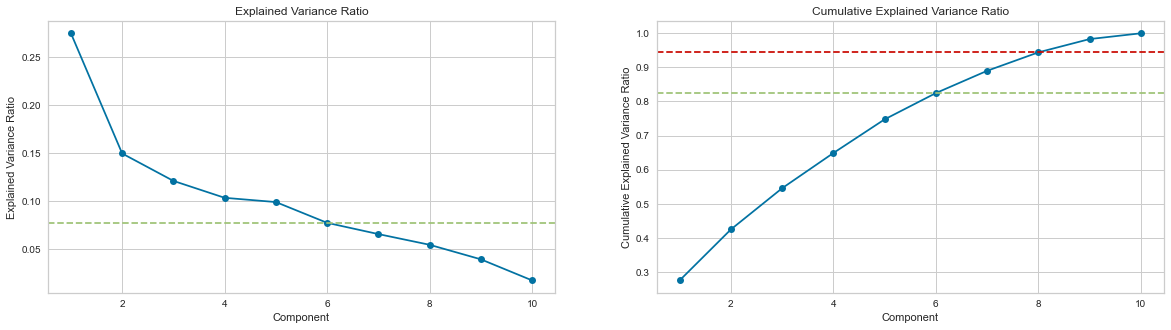

In [82]:
#Find out the best explained variance ratio and its cummulative
fig,ax = plt.subplots(ncols=2, figsize=(20,5))

ax[0].plot(range(1,11), pca.explained_variance_ratio_ ,marker='o')
ax[0].axhline(y = pca.explained_variance_ratio_[5], color = 'g', linestyle = 'dashed') 
ax[0].set_xlabel('Component')
ax[0].set_ylabel('Explained Variance Ratio')
ax[0].set_title("Explained Variance Ratio")

ax[1].plot(range(1,11), np.cumsum(pca.explained_variance_ratio_), marker='o')
ax[1].axhline(y = np.cumsum(pca.explained_variance_ratio_)[7], color = 'r', linestyle = 'dashed') 
ax[1].axhline(y = np.cumsum(pca.explained_variance_ratio_)[5], color = 'g', linestyle = 'dashed') 
ax[1].set_xlabel('Component')
ax[1].set_ylabel('Cumulative Explained Variance Ratio')
ax[1].set_title("Cumulative Explained Variance Ratio")

plt.show()

We could see , if we use elbow method to choose the best component (left graph with green dashed line) it will be 6.

But if we see in right graph (the green line dashed) with 6 dimension, we could only represents 82% of data . So we will choose 8 dimension instead which represents more than 90% of our data (the red line dashed)

In [83]:
#Create model PCA 8 Dimensions
pca_fin = PCA(n_components=8)
X_train = pca_fin.fit_transform(train_dfs)

No we have new dataset with only has 8 dimension for our model.

## Model Definition & Training

In this section we will try to cluster the dataset with some type of model.

### Model 1 : K-Means

We will find the best quantity of  cluster number with some iteration in range 2-5

__Find the best quantity of cluster__

Here we decide to check cluster range between 2 - 5 cluster for our own genres.

In [84]:
#Define Iteration Model
n = []
sh = []

for i in range(2,6):
    km = KMeans(n_clusters=i ,init="k-means++", random_state=42)
    km.fit(X_train)
    n.append(km.inertia_)
    sh.append(silhouette_score(X_train, km.labels_))

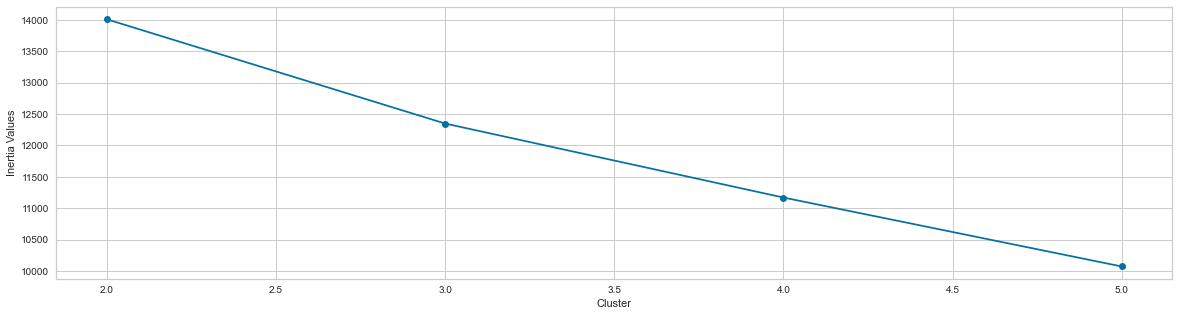

In [85]:
#Find out the best explained variance ratio
fig= plt.subplots(figsize=(20,5))

plt.plot(range(2,6), n ,marker='o')
plt.xlabel('Cluster')
plt.ylabel('Inertia Values')
plt.show()

From above graph, we could see the elbow method wether is in value 3 . Let's do some more check with Silhoutte Value.

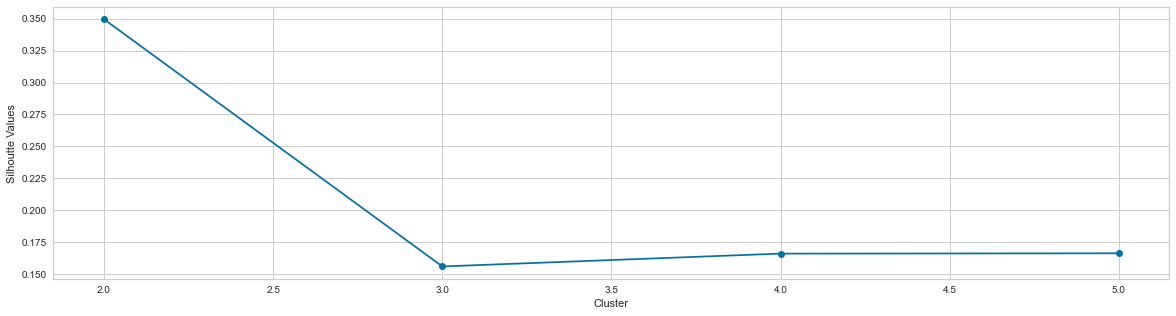

In [86]:
#Find out the best explained variance ratio
fig= plt.subplots(figsize=(20,5))

plt.plot(range(2,6), sh ,marker='o')
plt.xlabel('Cluster')
plt.ylabel('Silhoutte Values')
plt.show()

We were wrong, the optimum cluster is 2 because it has the highest Shilloute Score which means average distance between cluster almost are 0,35 . But in this context, we want to have more than 2 cluster here for dividing our genre since 2 genre is too general for songs.

So we decide cluster = 3 for instead of 4 or 5 . Eventhough 4 or 5 silhoutte score is higher than 3, it's okay because its difference is not that far.

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

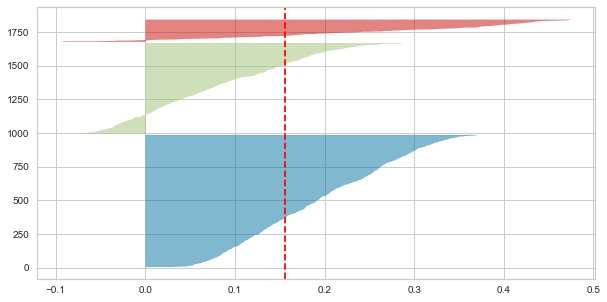

In [87]:
#Silhoutte of best n cluster
warnings.filterwarnings("ignore")
km = KMeans(n_clusters=3 ,random_state=42)

fig , ax = plt.subplots(figsize=(10,5));
visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax= ax);
visualizer.fit(X_train)

We could see from silhoutete plot, those 3 cluster is still in range of average silhoute score. The biggest cluster is cluster 2 and we have some datapoints in cluster 0 and 1 which is in wrong clusters.

#### Final Model 1 : KMeans

Below our best cluster model with n cluster = 3.

In [88]:
#Define the final Model
km_fin = KMeans(n_clusters=3, random_state=42)

#Train the dataset
km_fin.fit(X_train)


KMeans(n_clusters=3, random_state=42)

### Model 2 : DBSCAN

In model 2, we want to decide the best cluster by epsilon of data.

__Find the best epsilon value using NearestNeighbors__

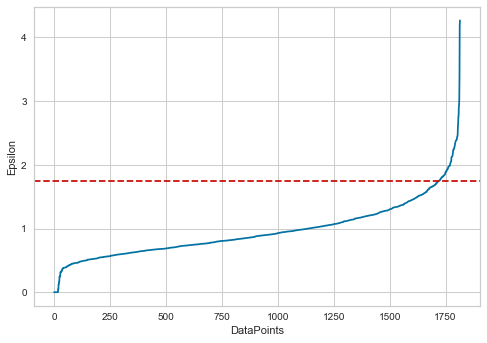

In [89]:
#Find nearest point
nn = NearestNeighbors(n_neighbors=20)
nn.fit(X_train)
distance,indices = nn.kneighbors(X_train)

distances = np.sort(distance, axis=0)

plt.plot(distances[:,1])
plt.axhline(y = 1.75, color = 'r', linestyle = 'dashed') 
plt.ylabel("Epsilon")
plt.xlabel("DataPoints")
plt.show()

From above graph, we could choose the maximum value of epsilon by using elbow method. And it goes in epsilon value around 1,75.

#### Final Model 2 : DBSCAN

Below our final model of DBSCAN with epsilon = 1.75

In [90]:
#Build the model
dbscan_fin = DBSCAN(eps=1.75 , min_samples=10)

#Train and predict the dataset
dbscan_fin.fit(X_train)


DBSCAN(eps=1.75, min_samples=10)

### Model 3 : Bayesian Gaussian Mixstures

In model 3, we will using Bayesian Gaussian Mixsture with 3 cluster, same as K-Means.

In [91]:
#Build the model
bgm_fin = BayesianGaussianMixture(n_components=3, n_init=10, random_state=42)

#Train Model
bgm_fin.fit(X_train)

BayesianGaussianMixture(n_components=3, n_init=10, random_state=42)

In [92]:
#Check weights data of every cluster
np.round(bgm_fin.weights_, 2)

array([0.38, 0.35, 0.26])

From above result, with bayesian gaussian mixsture with cluster = 3, we find out all cluster has its own probability of dataset and the probability are vary.

## Model Evaluation

Eventhough it's hard to evaluate and decide good clustering model because it's unsupervised learning, here we will try to compare visualization of each models. 

We will reduct the dataset into 2D dimension eventhough it won't represents all of the data, but only for visualization purpose.

### Dimension Reduction into 2D PCA

In [93]:
#Create mode PCA 2 Dimensions
pca2d = PCA(n_components=2)
X_train2d = pca2d.fit_transform(train_dfs)

### Visualization in 2D

#### Model 1 : K-Means

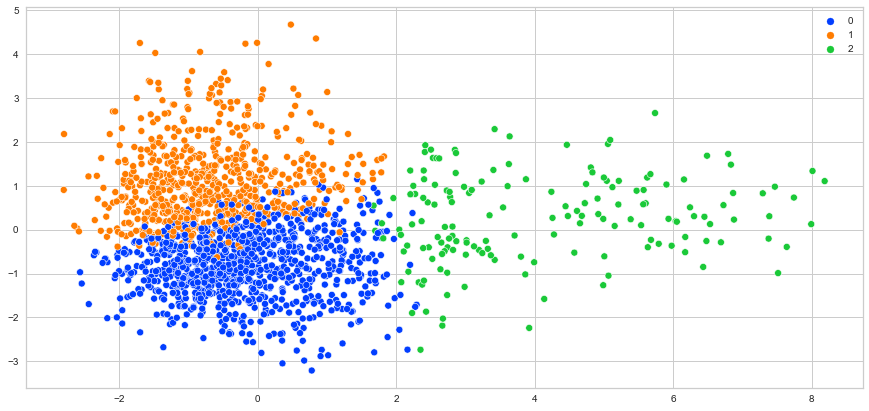

In [94]:
#Predict dataset
y1 = km_fin.predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train2d[:,0], y =X_train2d[:,1], hue=y1, palette="bright")
plt.show()

We could see, K-Means divided our dataset well into 3 cluster eventho there is some mixing data points in each cluster with others.

#### Model 2 : DBSCAN

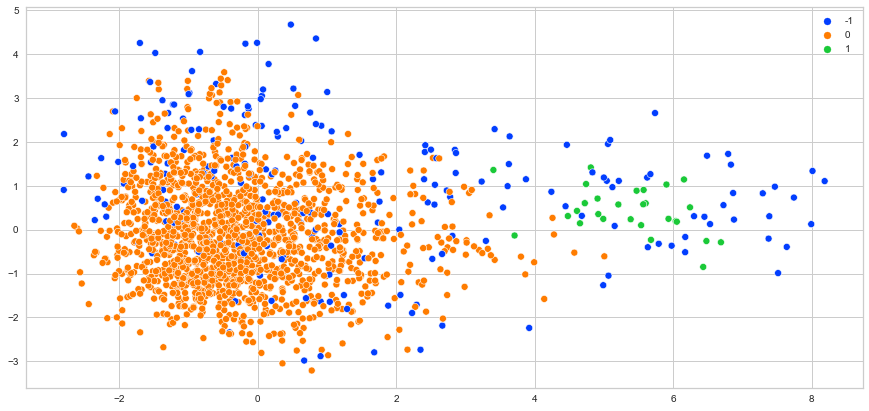

In [95]:
#Predict dataset
y2 = dbscan_fin.fit_predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train2d[:,0], y =X_train2d[:,1], hue=y2, palette="bright")
plt.show()

DBSCAN also divided our dataset into 3, but it's not divided well. We could see cluster 0 is rolling up with cluster -1.

#### Model 3 : Bayesian Gaussian Mixture

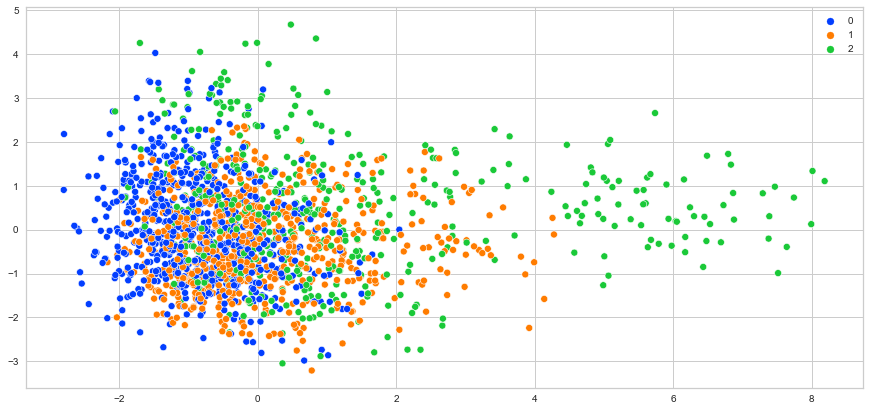

In [96]:
#Predict dataset
y3 = bgm_fin.fit_predict(X_train)

#Graph
plt.figure(figsize=(15,7))
sns.scatterplot(x =X_train2d[:,0], y =X_train2d[:,1], hue=y3, palette="bright")
plt.show()

While Bayesian Gaussian Mixsture, is worse than others . Their datapoints are mixed hardly with each clusters.

### Final Model

From those 3 models 2D Visualization above, we will choose __Model 1 : K-Means__ as our final model because it has the most clear boundaries between each cluster. 

Next we will analyze the result of the Model 1 - KMeans by comparing average values of each features between 3 clusters.

####  Analyze clustering Model 1 KMeans using Spider Plot

In [97]:
#Combine label with scaled raw data
X_result1 = pd.concat([pd.DataFrame(train_dfs, columns=train_df.columns), pd.Series(y1, name="Genre")], axis=1)

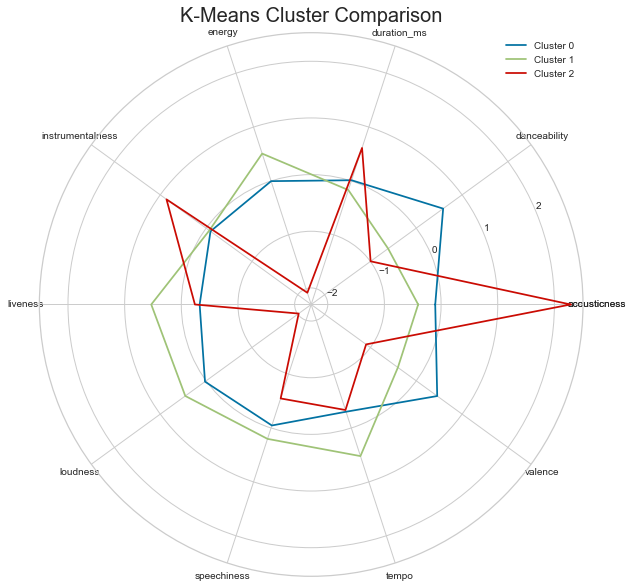

In [98]:
# Create Graph
label_loc = np.linspace(0,2*np.pi, len(X_result1.columns))
label = list(train_df.columns)
label = [*label, label[0]]
means = X_result1.groupby("Genre").mean().to_numpy()
means0 = [*means[0],means[0,0]]
means1 = [*means[1],means[1,0]]
means2 = [*means[2],means[2,0]]

plt.figure(figsize=(10,10))
plt.subplot(polar=True)
plt.plot(label_loc, means0 , label ="Cluster 0" )
plt.plot(label_loc, means1 , label ="Cluster 1" )
plt.plot(label_loc, means2 , label ="Cluster 2" )
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=label)
plt.title("K-Means Cluster Comparison", size=20)
plt.legend()
plt.show()

From above spider plot ,we could focus on intersection between the radius with each line . When the intersection is at outermost position, it means this line has high average of that feature. 

We might take some intepretation below :

> __Cluser 0 :__ this cluster has common characteristic of songs. It has fair danceability means this song recommended for dance music and has high valence . High valence indicates it has taste of happy from a music. From perspective of instrumental, it has fair level such as cluster 1 means this kind of song has fair instrument . This kind of songs also has fair tempo, speechiness, loudness , energy, accousticness and liveness. We could conclude this kind of songs as common sense of music such as pop, dance music such as maroon 5 stereo hearts or swalla jason derulo. The duration of this music is standard like the common music. Mostly people tend to like this kind of songs because it's such easy going music and most popular sense of music. We've made a call for this kind of music as __Koivos Earing__.


> __Cluser 1 :__ this kind of song is stronger form of cluster 0 . It has high tempo, loudness and energy. Seems it must be such a songs for strong ear. Speechiness and liveness from this kind of music are high meanwhile accousticness is low with fair instrumentalness. It means almost all of the song is contain lyrics than instrument. We could say rap,EDM, disco, rock and kind of song is one of this cluster group such as Bangarang Skrillex, Monster kanye west or Hearteater to the grave. This kind of music tend to has shortest duration than others . Not all off people like kind of this songs, typically people with strong ear loves to hear this kind of music. We called this cluster as __Megalof Earing__.



> __Cluster 2 :__ this kind of song is the reciprocal of Megalof Earing. This cluster has the lowest tempo, speechiness , loudness and danceability. We could say most of the song is contain with instrument  than lyrics with slow rythm and relax tempo. Also this song has highest accousticeness and the longest duration from others. We could say jazz, acoustic ,relax or sad kind of song is part of this cluster. Typically people who loves this kind of song is love serenity and calm that's why we call this cluster as __Eugenis Earing__ .





<br>



This result clustering might useful for company to create such as advertising or recommendation for the subscriber based their taste of music.



We've get 3 final cluster of our dataset, now we will label all of the dataset as a genre into its own cluster and export is as csv file.

- 0 : Koivos Earing
- 1 : Megalof Earing
- 2 : Eugenis Earing


In [99]:
#Final DataFrame
final_df = pd.concat([pd.DataFrame(train, columns=train.columns), pd.Series(y1, name="Genre")], axis=1)
final_df.to_csv("dataset/trainCluster.csv" , index=False)

## Model Inference

In this section we will try to labelled our test data by clustering modeling.

In [100]:
## DATA PREPROCESSING 

#prepare dataset
data_test = pd.read_csv("dataset/test.csv")

#take only necessary numeric columns
test_df = data_test[num_df.columns]

#scaling
test_dfs = scaler.transform(test_df)

#reduction into 8D
test_dfs = pca_fin.transform(test_dfs)

In [101]:
## PREDICT
y_test = km_fin.predict(test_dfs)

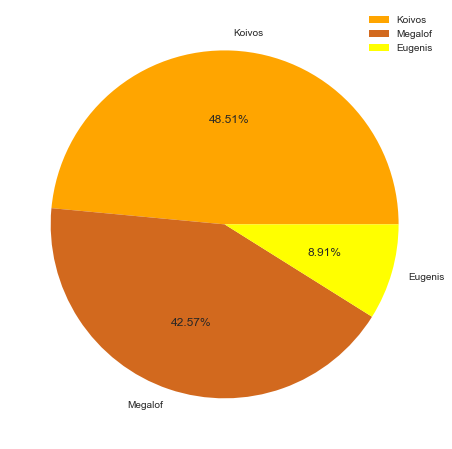

In [102]:
## RESULT
testCluster = pd.concat([data_test, pd.Series(y_test, name="Genre")], axis=1)
testCluster.head(2)

#Query
grc = testCluster.groupby("Genre")["song_title"].count().reset_index()

#Graph
plt.figure(figsize=(10,8))
plt.pie(grc["song_title"], labels=["Koivos","Megalof","Eugenis"], autopct='%.2f%%', explode=[0,0,0], colors =["orange", "chocolate" , "yellow"])
plt.legend(grc["Genre"], labels=["Koivos","Megalof","Eugenis"])
plt.show()


From above result, almost half of our test set is Koivos Earing Songs while 42% of it is Megalof and the rest are Euigenis.

In [103]:
## EXPORT RESULT INTO CSV
testCluster.to_csv("dataset/testCluster.csv" , index=False)

## Conclusion

1. Almost 62% of our songs dataset is filled up by Major song which has happy or positives taste.
2. Acousticness of a songs afffectig the loudness mostly. The more acoustic a song, the more its loudness dB decrease.
3. Acousticness didnt affect tempo because mostly most of music has similar tempo.
4. Some major songs has lowest decible of loudness (weak sound) , even major mode represent happy taste of songs. (Major =1 , Minor= 0). We could conclude there are not relation between mode of song against its loudness.
5. Value of valence tend to following values of danceibility. It has inline insight that tell high valence means the songs is happy , cheerfull or euphoric which able to use for dance.
6. The best model we choose in this context is using K-Means with 3 clusters. It could separate songs into 3 group clearly as their songs attributes behaviour. It's divided into :
  - Koivos Earing : contain songs which has common and fair attributes such as pop.
  - Megalof Earing : contain songs which has strong music such as rock, edm ,disco etc.
  - Eugenis Earing : contain songs which has melow or weak taste such as jazz, balad or acoustic.

This clustering could help us to categories any new song and as a basis for recomendation spotify users.


